- In this handson you will be building a deep neural network using tensorflow for binary classification
- The dataset has two features('feature1' and 'feature2') and one target variable
- The target variable(named as 'class') maps each record to either 0 or 1
- Some of the necessary pacakges required to read file and data visualization has been imported for you

In [0]:
!
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

The data is provided as file named 'blobs.csv'.  
Using pandas read the csv file and assign the resulting dataframe to variable 'data'   
for example if file name is 'xyz.csv' read file as **pd.read_csv('xyz.csv')** 

In [0]:
data = pd.read_csv('blobs.csv')

The following code extacts features and target variable and assign it to variable X and y respectively

In [0]:
X = data[['feature1', 'feature2']].values
Y = data['class'].values

In [0]:
colors=['green','blue']
cmap = matplotlib.colors.ListedColormap(colors)
#Plot the figure
plt.figure()
plt.title('Non-linearly separable classes')
plt.scatter(X[:,0], X[:,1], c=y,
           marker= 'o', s=50,cmap=cmap,alpha = 0.5 )
plt.savefig('fig1.png', bbox_inches='tight')

In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
_ = clf.fit(X, y)

In [0]:
def plot_decision_boundary1( X, y, model):
    plt.clf()
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1   
    colors=['blue','green']
    cmap = matplotlib.colors.ListedColormap(colors)   
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    A = model(np.c_[xx.ravel(), yy.ravel()])
    A = A.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, A, cmap="spring")
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, s=8,cmap=cmap)
    plt.title("Decision Boundary for learning rate:")
    plt.show()

In [0]:
plot_decision_boundary1(X.T,y,lambda x: clf.predict(x))

In [0]:
X_data = X.T
y_data = y.reshape(1,len(y))
y_data.shape

In [0]:
layer_dims = [2,25,25,1]

In [0]:
def placeholders(num_features):
  A_0 = tf.placeholder(dtype = tf.float64, shape = ([num_features,None]))
  Y = tf.placeholder(dtype = tf.float64, shape = ([1,None]))
  return A_0,Y

In [0]:
def initialize_parameters_deep(layer_dims):
  L = len(layer_dims)
  parameters = {}
  for l in range(1,L):
    parameters['W' + str(l)] = tf.Variable(initial_value=tf.random_normal([layer_dims[l], layer_dims[l-1]], dtype=tf.float64) * 0.01)
    parameters['b' + str(l)] = tf.Variable(initial_value=tf.zeros([layer_dims[l],1], dtype=tf.float64))
 
  
  return parameters 

In [0]:
def linear_forward_prop(A_prev,W,b, activation):
  Z = tf.add(tf.matmul(W, A_prev), b)
  if activation == "sigmoid":
    A = Z
  elif activation == "relu":
    A = tf.nn.relu(Z)
  return A

In [0]:
def l_layer_forwardProp(A_0, parameters):
  A = A_0
  L = len(parameters)//2
  for l in range(1,L):
    A_prev = A
    A = linear_forward_prop(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], "relu")
  A = linear_forward_prop(A, parameters['W' + str(L)], parameters['b' + str(L)], "sigmoid" )
  return A

In [0]:
def deep_model(X_train,Y_train, layer_dims, learning_rate, num_iter):
  num_features = layer_dims[0]
  A_0, Y = placeholders(num_features)
  parameters = initialize_parameters_deep(layer_dims)
  Z_final = l_layer_forwardProp(A_0, parameters)
  cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=Z_final,labels=Y))
  train_net = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
  init = tf.global_variables_initializer()
  
  with tf.Session() as sess:
    sess.run(init)
    for i in range(num_iter):
      _,c = sess.run([train_net, cost], feed_dict={A_0: X_train, Y: Y_train})
      if i % 1000 == 0:
        print(c)
    params = sess.run(parameters)
  return params

In [0]:

parameters = deep_model(X_data, y_data, layer_dims , 0.3, 10000)

In [0]:
def predict(A_0, parameters):
  with tf.Session() as sess:
    Z = l_layer_forwardProp(A_0, parameters)
    A = sess.run(tf.round(tf.sigmoid(Z)))
  return A

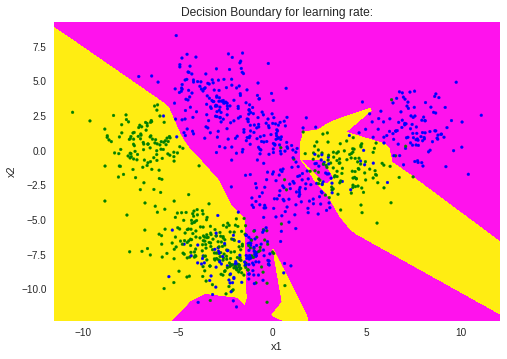

In [104]:
plot_decision_boundary1(X_data,y,lambda x: predict(x.T,parameters))